Оптимальная точка: [0. 0.]
Оптимальная точка для Розенброка: [0.99999973 0.99999946]


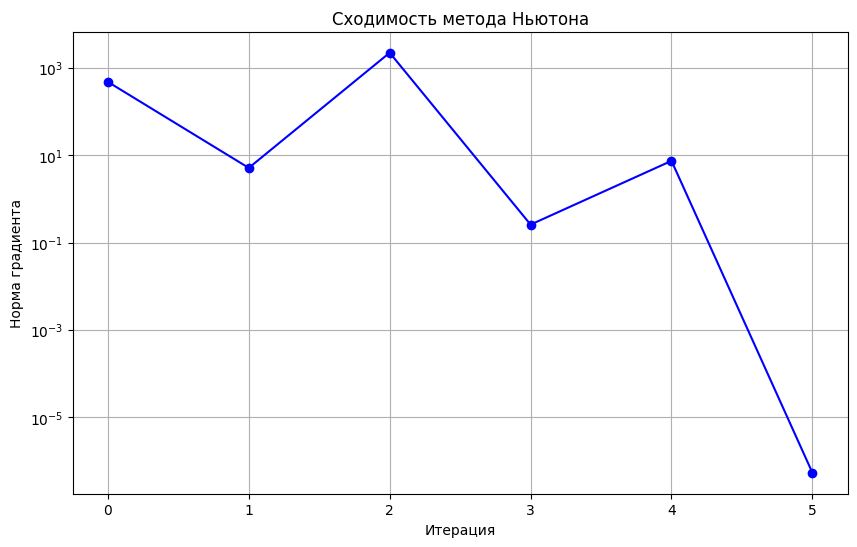

In [1]:
import numpy as np

def newton_method(f, grad_f, hessian_f, x0, tol=1e-6, max_iter=100):
    """
    Реализация метода Ньютона для оптимизации

    Параметры:
    f - целевая функция
    grad_f - функция, вычисляющая градиент
    hessian_f - функция, вычисляющая гессиан
    x0 - начальная точка
    tol - допустимая погрешность
    max_iter - максимальное число итераций
    """
    x = x0.copy()
    history = {'x': [], 'f': [], 'grad_norm': []}

    for i in range(max_iter):
        grad = grad_f(x)
        hessian = hessian_f(x)
        grad_norm = np.linalg.norm(grad)

        # Сохраняем историю
        history['x'].append(x.copy())
        history['f'].append(f(x))
        history['grad_norm'].append(grad_norm)

        # Критерий остановки
        if grad_norm < tol:
            break

        # Вычисляем направление
        try:
            direction = np.linalg.solve(hessian, -grad)
        except np.linalg.LinAlgError:
            # Если гессиан вырожден, добавляем регуляризацию
            direction = np.linalg.solve(hessian + 1e-6*np.eye(len(x)), -grad)

        # Обновляем точку
        x = x + direction

    return x, history

# Пример 1: Минимизация квадратичной функции
def quadratic(x):
    return x[0]**2 + 10*x[1]**2

def grad_quadratic(x):
    return np.array([2*x[0], 20*x[1]])

def hessian_quadratic(x):
    return np.array([[2, 0], [0, 20]])

x0 = np.array([10.0, 10.0])
x_opt, history = newton_method(quadratic, grad_quadratic, hessian_quadratic, x0)
print(f"Оптимальная точка: {x_opt}")  # Должно быть близко к [0, 0]

# Пример 2: Функция Розенброка
def rosenbrock(x):
    return 100*(x[1] - x[0]**2)**2 + (1 - x[0])**2

def grad_rosenbrock(x):
    return np.array([
        -400*x[0]*(x[1] - x[0]**2) - 2*(1 - x[0]),
        200*(x[1] - x[0]**2)
    ])

def hessian_rosenbrock(x):
    return np.array([
        [1200*x[0]**2 - 400*x[1] + 2, -400*x[0]],
        [-400*x[0], 200]
    ])

x0 = np.array([-1.5, 1.5])
x_opt, history = newton_method(rosenbrock, grad_rosenbrock, hessian_rosenbrock, x0)
print(f"Оптимальная точка для Розенброка: {x_opt}")  # Должно быть близко к [1, 1]

# Визуализация сходимости
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.semilogy(history['grad_norm'], 'b-o')
plt.xlabel('Итерация')
plt.ylabel('Норма градиента')
plt.title('Сходимость метода Ньютона')
plt.grid(True)
plt.show()